In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize, compose
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot
from mejiro.lenses import lens_util
from mejiro.utils import util

In [2]:
pipeline_params = util.hydra_to_dict(config.pipeline)
debugging = pipeline_params['debugging']
if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir
print(f'{pipeline_dir=}')

all_lenses = lens_util.get_detectable_lenses(pipeline_dir, with_subhalos=True, suppress_output=False)

pipeline_dir='/data/bwedig/mejiro/pipeline'


  0%|          | 0/158 [00:00<?, ?it/s]

100%|██████████| 158/158 [00:01<00:00, 86.15it/s] 


High SNR sources: 11
('high_z_snrs=[22.98793001721902, 149.43418496421452, 102.2487123960619, '
 '47.295963735581, 48.85955201174716, 46.45517163068739, 113.32829296137457, '
 '82.13981475874931, 82.74424795842077, 88.43838168275234, 33.38386261120626]')


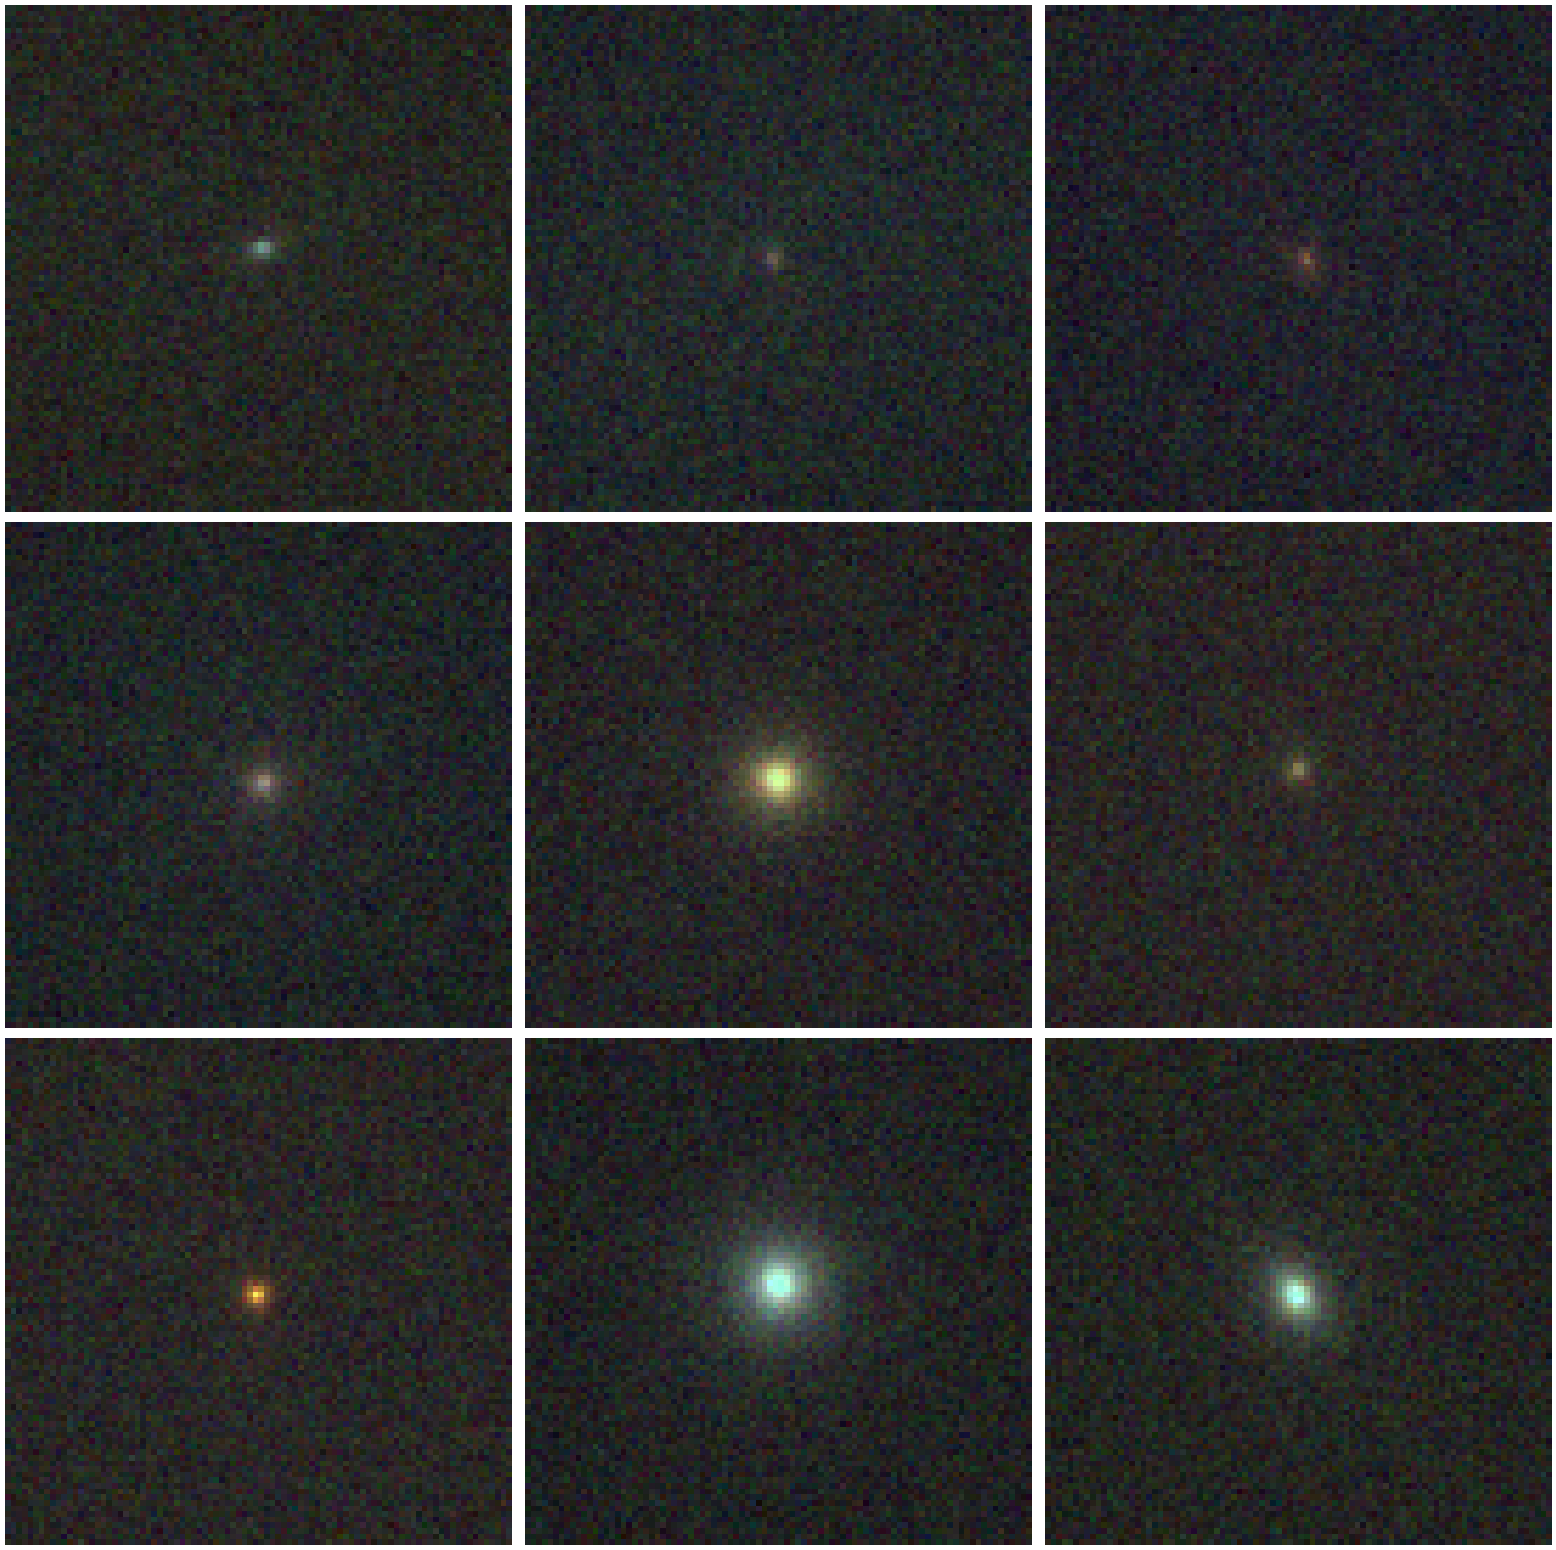

In [18]:
high_z_sources = [l for l in all_lenses if l.z_source > 5]
print(f'Count: {len(high_z_sources)}')

high_z_uids = [l.uid for l in high_z_sources]
high_z_snrs = [l.snr for l in high_z_sources]
pprint(f'{high_z_snrs=}')

high_z_color = [lens_util.get_sample(pipeline_dir, index=uid, model=False)[2] for uid in high_z_uids]

plot.rgb_plot_grid(high_z_color, side=3)

Count: 5
('dim_lens_snrs=[149.43418496421452, 102.2487123960619, 46.45517163068739, '
 '113.32829296137457, 21.331982851988787]')


IndexError: list index out of range

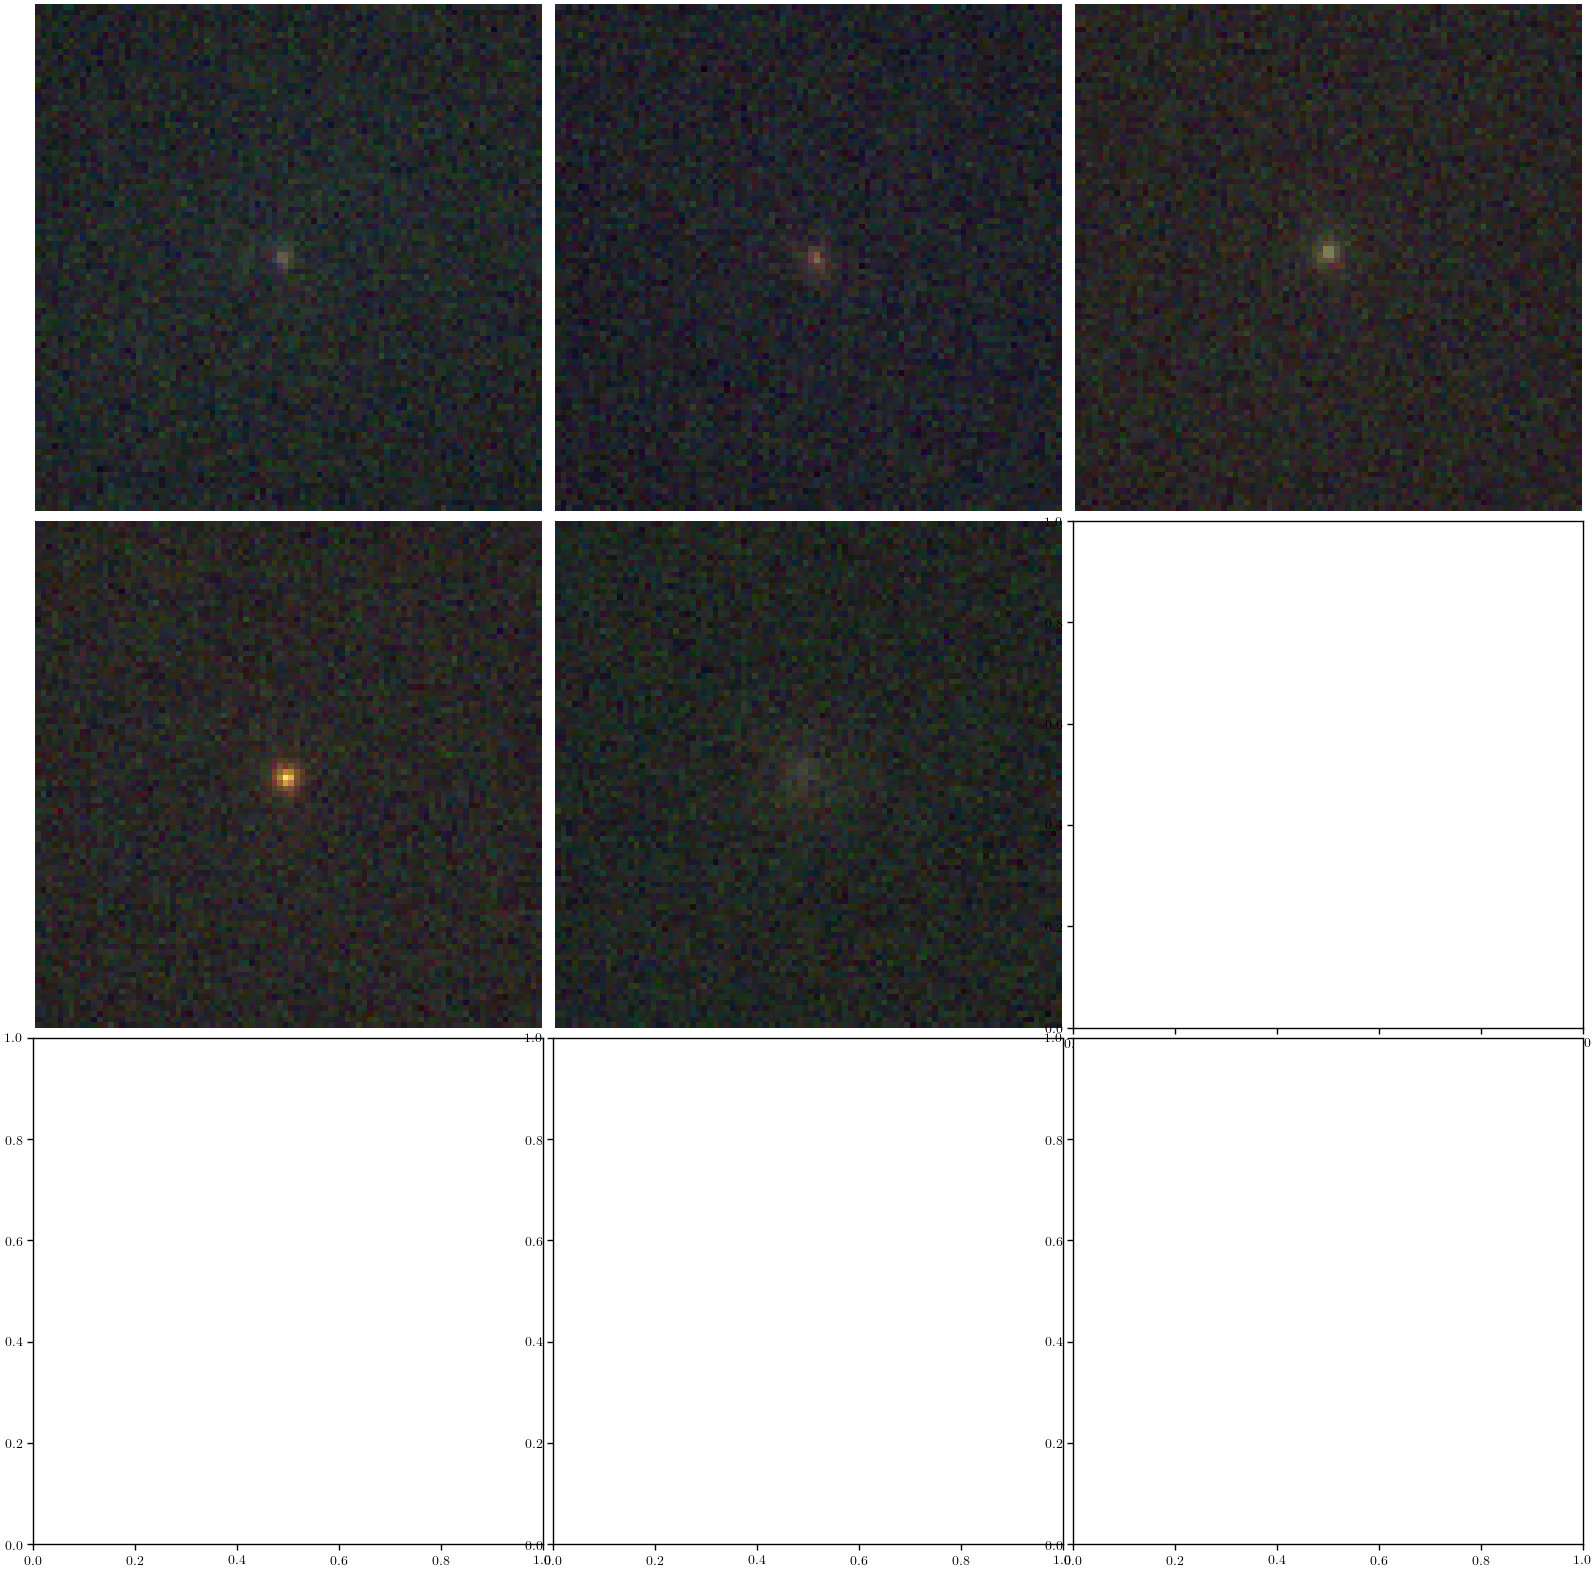

In [22]:
dim_lenses = [l for l in all_lenses if l.lens_mags['F129'] > 25]
print(f'Count: {len(dim_lenses)}')

dim_lens_uids = [l.uid for l in dim_lenses]
dim_lens_snrs = [l.snr for l in dim_lenses]
pprint(f'{dim_lens_snrs=}')

dim_lens_color = [lens_util.get_sample(pipeline_dir, index=uid, model=False)[2] for uid in dim_lens_uids]

plot.rgb_plot_grid(dim_lens_color, side=3)